In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

Notice how the training and test data is separated and how the data and the labels are separate from each other as well. Beware, this data set contains integers representing words. With the function below we can reverse using the index. Beware that we only took the top 10000 words. So some words cannot be reversed. These will be marked with a '?'

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[10]])

In [4]:
print(decoded_review)

? french horror cinema has seen something of a ? over the last couple of years with great films such as ? and ? romance ? on to the scene ? ? the ? just ? but ? head and ? over most modern horror ? and is ? one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the ? of the film and this in turn is ? by the excellent writing and acting that ? the film is a ? the plot ? on two main ? ? and black ? the ? character is a man named ? ? to ? for ? he is put in a ? with three others the ? ? ? body ? ? ? and his ? ? ? after a short while in the ? together they ? upon a ? place in the ? that ? an old ? after ? part of it they soon ? its ? ? and ? they may be able to use it to break through the ? ? br br black ? is a very interesting ? and i'm actually quite surprised that there aren't more films based on it as there's so much ? for things to do with it it's ? to say that ? makes the best of it's ? as despite it's ?

In [5]:
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)

In [7]:
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 88us/sample - loss: 0.5936 - accuracy: 0.6935 - val_loss: 0.4851 - val_accuracy: 0.7905
Epoch 2/20
15000/15000 [==============================] - 0s 17us/sample - loss: 0.4258 - accuracy: 0.8267 - val_loss: 0.4471 - val_accuracy: 0.7961
Epoch 3/20
15000/15000 [==============================] - 0s 16us/sample - loss: 0.3641 - accuracy: 0.8523 - val_loss: 0.3572 - val_accuracy: 0.8502
Epoch 4/20
15000/15000 [==============================] - 0s 17us/sample - loss: 0.3340 - accuracy: 0.8631 - val_loss: 0.3663 - val_accuracy: 0.8444
Epoch 5/20
15000/15000 [==============================] - 0s 17us/sample - loss: 0.3195 - accuracy: 0.8712 - val_loss: 0.3355 - val_accuracy: 0.8595
Epoch 6/20
15000/15000 [==============================] - 0s 16us/sample - loss: 0.3048 - accuracy: 0.8767 - val_loss: 0.3372 - val_accuracy: 0.8600
Epoch 7/20
15000/15000 [==============================] 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

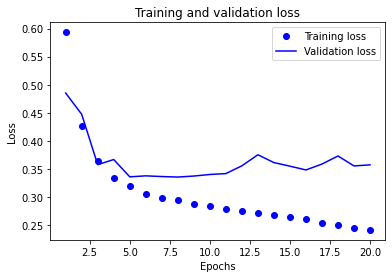

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

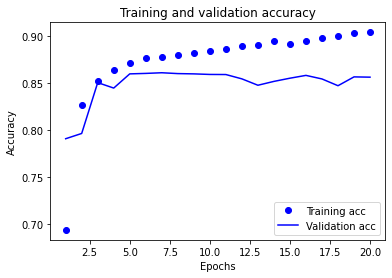

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()